# PEGG tutorial
This jupyter notebook provides a tutorial for using PEGG, as well as 3 case studies that demonstrate PEGG's functionality.

To download reference files, visit: [Reference Files](https://www.dropbox.com/sh/h6fdvpv3tyny27q/AADYVOkJe12XZiD4pf3_WXuga?dl=0)

For other documentation see: [pegg.readthedocs.io](https://pegg.readthedocs.io/en/latest/)

Author: Samuel Gould

Email: samgould@mit.edu

**Index**
1. [Case Study 1: Optimization of pegRNA design](#Case-Study-1:-Optimization-of-pegRNA-design)
2. [Case Study 2: Rapid Library Design](#Case-Study-2:-Rapid-Library-Design)
3. [Case Study 3: Modeling ClinVar Variants](#Case-Study-3:-Modeling-ClinVar-Variants)

# Case Study 1: Optimization of pegRNA design

**Motivation**: How can we rapidly design and test various types of pegRNAs to engineer and study a small number of mutations?


For this case study, we will walk through how to design a large number of different pegRNA permutations for a small number of mutations. The goal here is to generate many possible pegRNA designs for testing and optimization purposes. We will select a mutation from the MSK IMPACT 2017 mutation dataset and generate pegRNA designs, visualize some of these designs, and then generate oligos for cloning purposes. 

The MSK IMPACT 2017 dataset is available in the Dropbox folder of reference files here: [Reference Files](https://www.dropbox.com/sh/h6fdvpv3tyny27q/AADYVOkJe12XZiD4pf3_WXuga?dl=0). 

Alternatively, it can be downloaded from the cBioPortal here: [cBioPortal](http://www.cbioportal.org/datasets)

## Step 1: Loading in the PEGG module & reference files
The first step is loaded in the required reference files: 
1. A file containing mutation data
2. A reference genome, using the genome_loader() function
3. chrom_dict, which contains information about on/off target information
    - If you don't want/need this on/off target information, simply set chrom_dict='none'
    
For precise information about the format of reference files, see the [Quickstart guide](https://pegg.readthedocs.io/en/latest/quickstart.html).

**In the below codeblock, you will need to fill in the appropriate filepaths that correspond with the appropriate reference files.**

In [1]:
import pandas as pd
import pegg

In [2]:
#loading in required input files (requires a decent amount of RAM >= 9 Gb on machine)

#------loading in impact data set 2017---------------------
filepath = '/Users/samgould/Desktop/MSK_IMPACT_2017.txt'
mutant_input = pd.read_csv(filepath, sep='\t', header=1) 


#------loading in reference genome and organizing it into a 2-d list by chromosome---------------------
filepath_37 = '/Users/samgould/Desktop/FSR Lab/reference files/GRCh37/ncbi-genomes-2022-03-17/GCF_000001405.25_GRCh37.p13_genomic.fna.gz'
records, index_list = pegg.genome_loader(filepath_37)

#------generates minus strand sequences of chromosomes to speed up run time----------
minus_seqs = pegg.minus_seq_generator(records, index_list)

          
#---------loading in on/off-target efficiencies of sgRNAs in exonic regions (doesn't include others...)---------------------
file = '/Users/samgould/Desktop/FSR Lab/reference files/chrom_dict.pickle'
chrom_dict = pd.read_pickle(file)
#alternatively, set chrom_dict = 'none'


## Step 2: Selecting the mutation from the dataset and generating pegRNAs
Now let's pick a particular mutation in the dataset for which we want to create pegRNA designs. First we can look at the dataset:

In [87]:
mutant_input.head()

,Hugo_Symbol,Entrez_Gene_Id,Center,NCBI_Build,Chromosome,Start_Position,End_Position,Strand,Consequence,Variant_Classification,Variant_Type,Reference_Allele,Tumor_Seq_Allele1,Tumor_Seq_Allele2,dbSNP_RS,dbSNP_Val_Status,Tumor_Sample_Barcode,Matched_Norm_Sample_Barcode,Match_Norm_Seq_Allele1,Match_Norm_Seq_Allele2,Tumor_Validation_Allele1,Tumor_Validation_Allele2,Match_Norm_Validation_Allele1,Match_Norm_Validation_Allele2,Verification_Status,Validation_Status,Mutation_Status,Sequencing_Phase,Sequence_Source,Validation_Method,Score,BAM_File,Sequencer,t_ref_count,t_alt_count,n_ref_count,n_alt_count,HGVSc,HGVSp,HGVSp_Short,Transcript_ID,RefSeq,Protein_position,Codons,Hotspot,cDNA_change
0,SPEN,NaN,NaN,GRCh37,1,16265908,16265908,+,missense_variant,Missense_Mutation,SNP,A,A,T,NaN,NaN,P-0000004-T01-IM3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,400,73,NaN,NaN,ENST00000375759.3:c.10981A>T,p.Ile3661Phe,p.I3661F,ENST00000375759,NM_015001.2,3661.0,Att/Ttt,0,c.10981A>T
1,ALK,NaN,NaN,GRCh37,2,29543736,29543736,+,missense_variant,Missense_Mutation,SNP,A,A,G,NaN,NaN,P-0000004-T01-IM3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,180,13,NaN,NaN,ENST00000389048.3:c.1427T>C,p.Val476Ala,p.V476A,ENST00000389048,NM_004304.4,476.0,gTg/gCg,0,c.1427T>C
2,PDCD1,NaN,NaN,GRCh37,2,242793433,242793433,+,missense_variant,Missense_Mutation,SNP,G,G,A,NaN,NaN,P-0000004-T01-IM3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,225,15,NaN,NaN,ENST00000334409.5:c.644C>T,p.Ala215Val,p.A215V,ENST00000334409,NM_005018.2,215.0,gCc/gTc,0,c.644C>T
3,MAP3K1,NaN,NaN,GRCh37,5,56177843,56177843,+,missense_variant,Missense_Mutation,SNP,C,C,G,NaN,NaN,P-0000004-T01-IM3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,370,12,NaN,NaN,ENST00000399503.3:c.2816C>G,p.Ser939Cys,p.S939C,ENST00000399503,NM_005921.1,939.0,tCt/tGt,0,c.2816C>G
4,FLT4,NaN,NaN,GRCh37,5,180030313,180030313,+,missense_variant,Missense_Mutation,SNP,C,C,A,NaN,NaN,P-0000004-T01-IM3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,360,25,NaN,NaN,ENST00000261937.6:c.3971G>T,p.Arg1324Leu,p.R1324L,ENST00000261937,NM_182925.4,1324.0,cGg/cTg,0,c.3971G>T


We can select one of these mutation arbitrarily. Here I'm just picking the mutation that falls in row 4:

In [91]:
mutant_input.iloc[[4]]

,Hugo_Symbol,Entrez_Gene_Id,Center,NCBI_Build,Chromosome,Start_Position,End_Position,Strand,Consequence,Variant_Classification,Variant_Type,Reference_Allele,Tumor_Seq_Allele1,Tumor_Seq_Allele2,dbSNP_RS,dbSNP_Val_Status,Tumor_Sample_Barcode,Matched_Norm_Sample_Barcode,Match_Norm_Seq_Allele1,Match_Norm_Seq_Allele2,Tumor_Validation_Allele1,Tumor_Validation_Allele2,Match_Norm_Validation_Allele1,Match_Norm_Validation_Allele2,Verification_Status,Validation_Status,Mutation_Status,Sequencing_Phase,Sequence_Source,Validation_Method,Score,BAM_File,Sequencer,t_ref_count,t_alt_count,n_ref_count,n_alt_count,HGVSc,HGVSp,HGVSp_Short,Transcript_ID,RefSeq,Protein_position,Codons,Hotspot,cDNA_change
4,FLT4,NaN,NaN,GRCh37,5,180030313,180030313,+,missense_variant,Missense_Mutation,SNP,C,C,A,NaN,NaN,P-0000004-T01-IM3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,360,25,NaN,NaN,ENST00000261937.6:c.3971G>T,p.Arg1324Leu,p.R1324L,ENST00000261937,NM_182925.4,1324.0,cGg/cTg,0,c.3971G>T


Now we need to specify parameters for our pegRNA designs for this mutation. 
- First we have to identify which mutation we want to generate designs for by putting the row index in "mut_idx_list".
- Next, we specify which type of PAM sequence we want to use. Here we're using an 'NGG' PAM sequence.
- Then, we specify which reverse transcriptase template (RTT) lengths and primer binding site (PBS) lengths we want PEGG to generate pegRNA designs with. We're choosing a broad range here to create many possibilities.
- Finally, we specify how many pegRNA designs we want PEGG to try and spit out. It's not guaranteed to hit this number, depending on the number of available PAM sequences, but it will try and return this many pegRNA designs.

In [12]:
#select list of mutations to model
mut_idx_list = [4]

PAM = 'NGG'

RTT_lengths = [10, 15, 20, 25, 30]
PBS_lengths = [5,7, 10, 12]

guides_per_mut=200

ranked_filtered = pegg.run(mutant_input, mut_idx_list, records, index_list, minus_seqs, chrom_dict, PAM, RTT_lengths, PBS_lengths, guides_per_mut)


In [13]:
ranked_filtered

,mutant index,gene,chr,start,end,variant_type,ref_allele,mut_allele,PAM location,PAM strand,PAM,protospacer,PBS,PBS length,RTT,RTT length,PBS_RTT_5to3,distance mut to 5' RTT,distance to nick,target sequence,target length,MIT specificity,CFD efficiency percentile,contains terminator?,contains RE site?,last templated base C?,PBS GC content,composite score,target genomic edit
0,4,FLT4,chr5,180030313,180030313,SNP,C,A,180030303,+,CGG,TGTAAAACACCTGGCCTCCT,TTGTGGACCGGA,12,GGAGCCCGGGGGTCGAGTCCGGCGGCGGCG,30,GCGGCGGCGGCCTGAGCTGGGGGCCCGAGGAGGCCAGGTGTT,17,13,GCTGTTGTAAAACACCTGGCCTCCTCGGGCCCCCCGCTCAGGCCGC...,60,60,35,no,no,no,0.583333,2.950000,CAGCTCCCCATACTCGCTGTTGTAAAACACCTGGCCTCCTCGGGCC...
1,4,FLT4,chr5,180030313,180030313,SNP,C,A,180030326,-,CGG,CTGACTCCCAAGGGAGGCGG,CCTCCCTTGGGA,12,TCCTCGGGCCCCCAGCTCAGGCCGCCGCCG,30,TCCTCGGGCCCCCAGCTCAGGCCGCCGCCGCCTCCCTTGGGA,14,16,ACCTGGCCTCCTCGGGCCCCCCGCTCAGGCCGCCGCCGCCTCCCTT...,60,71,63,no,no,no,0.666667,2.873333,CAGCTCCCCATACTCGCTGTTGTAAAACACCTGGCCTCCTCGGGCC...
2,4,FLT4,chr5,180030313,180030313,SNP,C,A,180030304,+,GGG,GTAAAACACCTGGCCTCCTC,TGTGGACCGGAG,12,GAGCCCGGGGGTCGAGTCCGGCGGCGGCGG,30,GGCGGCGGCGGCCTGAGCTGGGGGCCCGAGGAGGCCAGGTGT,18,12,CTGTTGTAAAACACCTGGCCTCCTCGGGCCCCCCGCTCAGGCCGCC...,60,75,35,no,no,no,0.666667,2.766667,CAGCTCCCCATACTCGCTGTTGTAAAACACCTGGCCTCCTCGGGCC...
3,4,FLT4,chr5,180030313,180030313,SNP,C,A,180030326,-,CGG,CTGACTCCCAAGGGAGGCGG,CCTCCCTTGG,10,TCCTCGGGCCCCCAGCTCAGGCCGCCGCCG,30,TCCTCGGGCCCCCAGCTCAGGCCGCCGCCGCCTCCCTTGG,14,16,ACCTGGCCTCCTCGGGCCCCCCGCTCAGGCCGCCGCCGCCTCCCTT...,60,71,63,no,no,no,0.700000,2.706667,CAGCTCCCCATACTCGCTGTTGTAAAACACCTGGCCTCCTCGGGCC...
4,4,FLT4,chr5,180030313,180030313,SNP,C,A,180030329,-,CGG,ACCCTGACTCCCAAGGGAGG,CCCTT,5,TCGGGCCCCCAGCTCAGGCCGCCGCCGCCT,30,TCGGGCCCCCAGCTCAGGCCGCCGCCGCCTCCCTT,11,19,TGGCCTCCTCGGGCCCCCCGCTCAGGCCGCCGCCGCCTCCCTTGGG...,60,55,63,no,no,no,0.600000,2.646667,CAGCTCCCCATACTCGCTGTTGTAAAACACCTGGCCTCCTCGGGCC...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191,4,FLT4,chr5,180030313,180030313,SNP,C,A,180030314,-,CGG,GGAGGCGGCGGCGGCCTGAG,AGGCCGC,7,CCCCCAGCTC,10,CCCCCAGCTCAGGCCGC,6,4,CTGTTGTAAAACACCTGGCCTCCTCGGGCCCCCCGCTCAGGCCGCC...,60,34,7,no,no,yes,0.857143,-1.075714,CAGCTCCCCATACTCGCTGTTGTAAAACACCTGGCCTCCTCGGGCC...
192,4,FLT4,chr5,180030313,180030313,SNP,C,A,180030323,-,CGG,ACTCCCAAGGGAGGCGGCGG,CCGCCTC,7,CAGCTCAGGCCGCCG,15,CAGCTCAGGCCGCCGCCGCCTC,2,13,AACACCTGGCCTCCTCGGGCCCCCCGCTCAGGCCGCCGCCGCCTCC...,60,67,27,no,no,yes,0.857143,-1.079048,CAGCTCCCCATACTCGCTGTTGTAAAACACCTGGCCTCCTCGGGCC...
193,4,FLT4,chr5,180030313,180030313,SNP,C,A,180030314,-,CGG,GGAGGCGGCGGCGGCCTGAG,AGGCCGCCGC,10,CCCCCAGCTC,10,CCCCCAGCTCAGGCCGCCGC,6,4,CTGTTGTAAAACACCTGGCCTCCTCGGGCCCCCCGCTCAGGCCGCC...,60,34,7,no,no,yes,0.900000,-1.290000,CAGCTCCCCATACTCGCTGTTGTAAAACACCTGGCCTCCTCGGGCC...
194,4,FLT4,chr5,180030313,180030313,SNP,C,A,180030314,-,CGG,GGAGGCGGCGGCGGCCTGAG,AGGCCGCCGCCG,12,CCCCCAGCTC,10,CCCCCAGCTCAGGCCGCCGCCG,6,4,CTGTTGTAAAACACCTGGCCTCCTCGGGCCCCCCGCTCAGGCCGCC...,60,34,7,no,no,yes,0.916667,-1.373333,CAGCTCCCCATACTCGCTGTTGTAAAACACCTGGCCTCCTCGGGCC...


Upon printing the output, we can see that PEGG generated 196 pegRNA desgins and ranked them according to their composite score. We can also look at how many distinct protospacers are represented among these designs:

In [18]:
print('There are ' + str(len(np.unique(ranked_filtered['PAM location']))) + ' distinct PAM sequences represented.')

There are 14 distinct PAM sequences represented.


## Step 3: Visualization of pegRNA designs

Next if we want to visualize some of these designs, we can use the built-in visualization functions. Let's look at the first/highest ranked design, and the lowest ranked design. 

To choose which design to display, we simply have to designate which row from our ranked_filtered output to visualize:

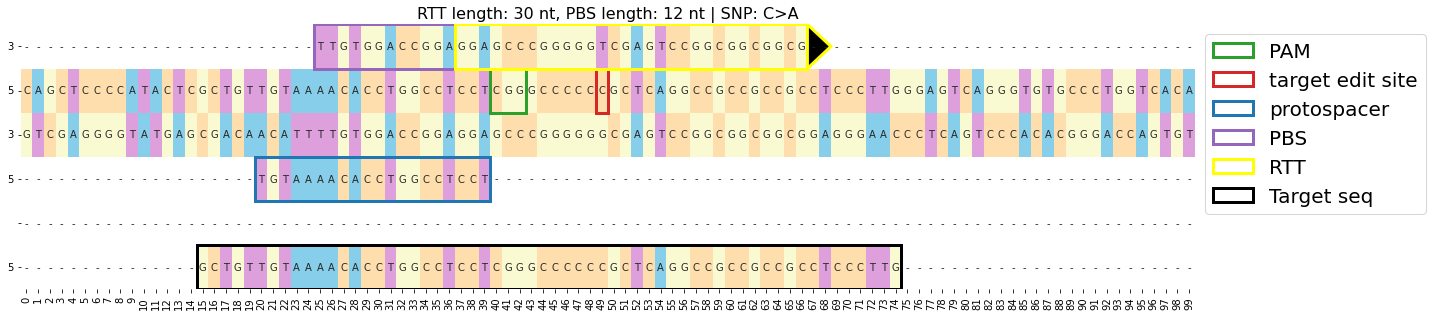

In [19]:
#visualizing top ranked guide
pegRNA_df_loc=0 #choosing which guide to display from the above dataframe
h = pegg.pegrna_display(ranked_filtered, pegRNA_df_loc, records, index_list)



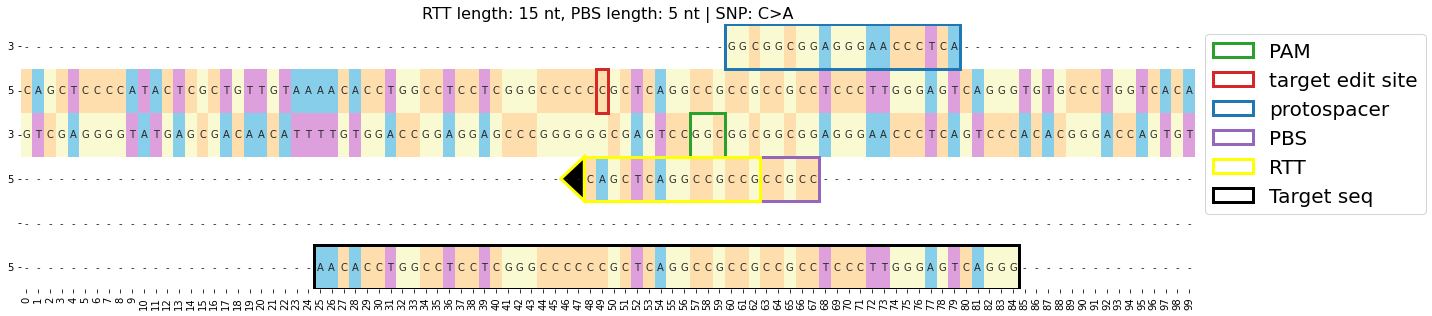

In [20]:
#visualizing lowest ranked guide
pegRNA_df_loc=195 #choosing which guide to display from the above dataframe
h = pegg.pegrna_display(ranked_filtered, pegRNA_df_loc, records, index_list)

**In this example, it's pretty clear why the lowest ranked guide is so poor:**
- It has only 1 base of homology overhang.
- Its PBS has a 100% GC content.

There's an **alternative visualization** tool that's more barebones and is built-in to PEGG. We can also use it to visualize the 3' extension of the top ranked and lowest ranked guide:

In [27]:
#another form of visualization (of 3' extension only) for top ranked guide
pegg.align_display(ranked_filtered[0:1], records, index_list)

CAGCTCCCCATACTCGCTGTTGTAAAACACCTGGCCTCCTCGGGCCCCCCGCTCAGGCCGCCGCCGCCTCCCTTGGGAGTCAGGGTGTGCCCTGGTCACA
                         ||||||||||||||||||||||||.|||||||||||||||||                                 
-------------------------AACACCTGGCCTCCTCGGGCCCCCAGCTCAGGCCGCCGCCGC---------------------------------
  Score=82



In [28]:
#lowest ranked guide
pegg.align_display(ranked_filtered[195:196], records, index_list)

CAGCTCCCCATACTCGCTGTTGTAAAACACCTGGCCTCCTCGGGCCCCCCGCTCAGGCCGCCGCCGCCTCCCTTGGGAGTCAGGGTGTGCCCTGGTCACA
                                                |.||||||||||||||||||                                
------------------------------------------------CAGCTCAGGCCGCCGCCGCC--------------------------------
  Score=38



In [30]:
#or we can look at the top 5:
pegg.align_display(ranked_filtered[0:5], records, index_list)

CAGCTCCCCATACTCGCTGTTGTAAAACACCTGGCCTCCTCGGGCCCCCCGCTCAGGCCGCCGCCGCCTCCCTTGGGAGTCAGGGTGTGCCCTGGTCACA
                         ||||||||||||||||||||||||.|||||||||||||||||                                 
-------------------------AACACCTGGCCTCCTCGGGCCCCCAGCTCAGGCCGCCGCCGC---------------------------------
  Score=82

CAGCTCCCCATACTCGCTGTTGTAAAACACCTGGCCTCCTCGGGCCCCCCGCTCAGGCCGCCGCCGCCTCCCTTGGGAGTCAGGGTGTGCCCTGGTCACA
                                    |||||||||||||.||||||||||||||||||||||||||||                      
------------------------------------TCCTCGGGCCCCCAGCTCAGGCCGCCGCCGCCTCCCTTGGGA----------------------
  Score=82

CAGCTCCCCATACTCGCTGTTGTAAAACACCTGGCCTCCTCGGGCCCCCCGCTCAGGCCGCCGCCGCCTCCCTTGGGAGTCAGGGTGTGCCCTGGTCACA
                          |||||||||||||||||||||||.||||||||||||||||||                                
--------------------------ACACCTGGCCTCCTCGGGCCCCCAGCTCAGGCCGCCGCCGCC--------------------------------
  Score=82

CAGCTCCCCATACTCGCTGTTGTAAAACACCTGGCCTCCTCGGGCCCCCCGCTCA

## Step 4: Oligo Design
Now that we have our guide designs, we can generate the oligos for cloning these pegRNAs for downstream testing.
The oligo_generator() provides 5' and 3' adapters with Esp3I and EcoRI sites for restriction cloning, but these can also be provided by the user. 

Additionally, users need to specify whether they want to append a ‘G’ nucleotide to the beginning of the protospacer. This is reccomended in the original Anzalone et al., 2019 prime editing paper.

A unique feature of PEGG is the option to include a sensor region in the oligo. This sensor region is a synthetic version of the endogenous target site, providing the ability to measure a proxy of editing outcomes at the endogenous locus. This approach can be useful in the context of a library of pegRNAs, allowing for the measurement of pegRNA enrichment/depletion as well as a proxy of editing outcomes with a single NGS amplicon.


For more specifics see the [Oligo Generation instructions in the quickstart guide](https://pegg.readthedocs.io/en/latest/quickstart.html#oligo-generation).

In the below example, we **will include a sensor region and append a G to the beginning of the protospacers**:

In [32]:
oligos_w_sensor = pegg.oligo_generator(ranked_filtered, append_proto_G=True, sensor=True)


In [33]:
oligos_w_sensor.head()

,mutant index,gene,chr,start,end,variant_type,ref_allele,mut_allele,PAM location,PAM strand,PAM,protospacer,PBS,PBS length,RTT,RTT length,PBS_RTT_5to3,distance mut to 5' RTT,distance to nick,target sequence,target length,MIT specificity,CFD efficiency percentile,contains terminator?,contains RE site?,last templated base C?,PBS GC content,composite score,target genomic edit,pegRNA_oligo,epegRNA_tevopreQ1_oligo
0,4,FLT4,chr5,180030313,180030313,SNP,C,A,180030303,+,CGG,TGTAAAACACCTGGCCTCCT,TTGTGGACCGGA,12,GGAGCCCGGGGGTCGAGTCCGGCGGCGGCG,30,GCGGCGGCGGCCTGAGCTGGGGGCCCGAGGAGGCCAGGTGTT,17,13,GCTGTTGTAAAACACCTGGCCTCCTCGGGCCCCCCGCTCAGGCCGC...,60,60,35,no,no,no,0.583333,2.950000,CAGCTCCCCATACTCGCTGTTGTAAAACACCTGGCCTCCTCGGGCC...,AGCGTACACGTCTCACACCGTGTAAAACACCTGGCCTCCTGTTTTA...,AGCGTACACGTCTCACACCGTGTAAAACACCTGGCCTCCTGTTTTA...
1,4,FLT4,chr5,180030313,180030313,SNP,C,A,180030326,-,CGG,CTGACTCCCAAGGGAGGCGG,CCTCCCTTGGGA,12,TCCTCGGGCCCCCAGCTCAGGCCGCCGCCG,30,TCCTCGGGCCCCCAGCTCAGGCCGCCGCCGCCTCCCTTGGGA,14,16,ACCTGGCCTCCTCGGGCCCCCCGCTCAGGCCGCCGCCGCCTCCCTT...,60,71,63,no,no,no,0.666667,2.873333,CAGCTCCCCATACTCGCTGTTGTAAAACACCTGGCCTCCTCGGGCC...,AGCGTACACGTCTCACACCGCTGACTCCCAAGGGAGGCGGGTTTTA...,AGCGTACACGTCTCACACCGCTGACTCCCAAGGGAGGCGGGTTTTA...
2,4,FLT4,chr5,180030313,180030313,SNP,C,A,180030304,+,GGG,GTAAAACACCTGGCCTCCTC,TGTGGACCGGAG,12,GAGCCCGGGGGTCGAGTCCGGCGGCGGCGG,30,GGCGGCGGCGGCCTGAGCTGGGGGCCCGAGGAGGCCAGGTGT,18,12,CTGTTGTAAAACACCTGGCCTCCTCGGGCCCCCCGCTCAGGCCGCC...,60,75,35,no,no,no,0.666667,2.766667,CAGCTCCCCATACTCGCTGTTGTAAAACACCTGGCCTCCTCGGGCC...,AGCGTACACGTCTCACACCGGTAAAACACCTGGCCTCCTCGTTTTA...,AGCGTACACGTCTCACACCGGTAAAACACCTGGCCTCCTCGTTTTA...
3,4,FLT4,chr5,180030313,180030313,SNP,C,A,180030326,-,CGG,CTGACTCCCAAGGGAGGCGG,CCTCCCTTGG,10,TCCTCGGGCCCCCAGCTCAGGCCGCCGCCG,30,TCCTCGGGCCCCCAGCTCAGGCCGCCGCCGCCTCCCTTGG,14,16,ACCTGGCCTCCTCGGGCCCCCCGCTCAGGCCGCCGCCGCCTCCCTT...,60,71,63,no,no,no,0.700000,2.706667,CAGCTCCCCATACTCGCTGTTGTAAAACACCTGGCCTCCTCGGGCC...,AGCGTACACGTCTCACACCGCTGACTCCCAAGGGAGGCGGGTTTTA...,AGCGTACACGTCTCACACCGCTGACTCCCAAGGGAGGCGGGTTTTA...
4,4,FLT4,chr5,180030313,180030313,SNP,C,A,180030329,-,CGG,ACCCTGACTCCCAAGGGAGG,CCCTT,5,TCGGGCCCCCAGCTCAGGCCGCCGCCGCCT,30,TCGGGCCCCCAGCTCAGGCCGCCGCCGCCTCCCTT,11,19,TGGCCTCCTCGGGCCCCCCGCTCAGGCCGCCGCCGCCTCCCTTGGG...,60,55,63,no,no,no,0.600000,2.646667,CAGCTCCCCATACTCGCTGTTGTAAAACACCTGGCCTCCTCGGGCC...,AGCGTACACGTCTCACACCGACCCTGACTCCCAAGGGAGGGTTTTA...,AGCGTACACGTCTCACACCGACCCTGACTCCCAAGGGAGGGTTTTA...


Scrolling all the way to the right in this dataframe reveals our two columns that correspond with the oligo design. The first column "pegRNA_oligo" is the traditional pegRNA (here with an additional sensor region), while "epegRNA_tevopreQ1_oligo" is an epegRNA, which contains a structural motif at the end of the 3' extension, which prevents degradation of the pegRNA.

From here, we can simply export this entire dataframe as a csv and use these columns for ordering oligos, or we can create a separate dataframe with just our oligo sequence. Here I'm showing how you could export just the epegRNA oligo sequences:

In [36]:
ids = ['epeg_' + str(i) for i in range(len(oligos_w_sensor))]
data = {'guide_id': ids, 'epeg_seq':list(oligos_w_sensor["epegRNA_tevopreQ1_oligo"])}
epeg_oligos = pd.DataFrame(data = data)
epeg_oligos
#epeg_oligos.to_csv() to export this dataframe to a csv file...
                                                                 

,guide_id,epeg_seq
0,epeg_0,AGCGTACACGTCTCACACCGTGTAAAACACCTGGCCTCCTGTTTTA...
1,epeg_1,AGCGTACACGTCTCACACCGCTGACTCCCAAGGGAGGCGGGTTTTA...
2,epeg_2,AGCGTACACGTCTCACACCGGTAAAACACCTGGCCTCCTCGTTTTA...
3,epeg_3,AGCGTACACGTCTCACACCGCTGACTCCCAAGGGAGGCGGGTTTTA...
4,epeg_4,AGCGTACACGTCTCACACCGACCCTGACTCCCAAGGGAGGGTTTTA...
...,...,...
191,epeg_191,AGCGTACACGTCTCACACCGGGAGGCGGCGGCGGCCTGAGGTTTTA...
192,epeg_192,AGCGTACACGTCTCACACCGACTCCCAAGGGAGGCGGCGGGTTTTA...
193,epeg_193,AGCGTACACGTCTCACACCGGGAGGCGGCGGCGGCCTGAGGTTTTA...
194,epeg_194,AGCGTACACGTCTCACACCGGGAGGCGGCGGCGGCCTGAGGTTTTA...


# Case Study 2: Rapid Library Design

**Motivation**: How can we rapidly design and construct complex libraries of pegRNAs to engineer all disease-associated mutations in genes of interest?

The most powerful use-case for PEGG is in rapidly designing large libraries of pegRNA for multiplexed mutation engineering. 

PEGG includes automated library generation and visualization functions. These provide the ability to automatically select all of the mutations associated with a particular gene, generate pegRNAs for these mutations, and generate neutral pegRNAs that introduce silent mutations as internal controls.

The code below shows how to generate the neutral/silent substitutions based on inputting information about a gene as well as providing a list of the coding sequence locations of the relevant transcript. This list is generated manually in the example below.

Here, we're generating all of the possible neutral codon substitutions for TP53:

In [37]:
#testing automated library generation functions

gene_name='TP53'
strand = '-'
chrom='chr17'
#listing CDS of transcript ordered by +end
start_end_cds = [[7572930, 7573008],
 [7573927, 7574033],
 [7576853, 7576926],
 [7577019, 7577155],
 [7577499, 7577608],
 [7578177, 7578289],
 [7578371, 7578554],
 [7579312, 7579590],
 [7579700, 7579721],
 [7579839, 7579912]]
neutral_p53 = pegg.neutral_substitutions(gene_name, chrom, strand, start_end_cds, records, index_list)
neutral_p53

,Hugo_Symbol,Chromosome,Start_Position,End_Position,Variant_Type,Reference_Allele,Tumor_Seq_Allele2,codon,ref_aa,mut_aa,classification
0,TP53,17,7579907,7579909,ONP,CTC,TTC,2,E,E,neutral
1,TP53,17,7579904,7579906,ONP,CTC,TTC,3,E,E,neutral
2,TP53,17,7579901,7579903,ONP,CGG,TGG,4,P,P,neutral
3,TP53,17,7579898,7579900,ONP,CTG,TTG,5,Q,Q,neutral
4,TP53,17,7579895,7579897,ONP,TGA,ACT,6,S,S,neutral
...,...,...,...,...,...,...,...,...,...,...,...
372,TP53,17,7572942,7572944,ONP,CCC,TCC,389,G,G,neutral
373,TP53,17,7572939,7572941,ONP,AGG,TGG,390,P,P,neutral
374,TP53,17,7572936,7572938,ONP,GTC,ATC,391,D,D,neutral
375,TP53,17,7572933,7572935,ONP,TGA,ACT,392,S,S,neutral


If you instead wanted to generate the start_end_cds using existing genome annotation files, this can be done by generating a genome anotation database (.db) file and then using this to access transcript information. This is outlined nicely at the following link: https://blog.liang2.tw/posts/2018/06/gene-annotation-using-gffutils/

Importantly, you still need to define the precise transcript ID that correspond with the gene isoform you are targeting, as is shown in the code below, which assumes that the .db file has been generated:

In [38]:
#import gffutils

#file = '/Users/samgould/Desktop/FSR Lab/reference files/gencode_v19.db'
#db = gffutils.FeatureDB(file)

#tx = 'ENST00000269305.4'
#cds = list(db.children(tx, order_by='+end', featuretype=['CDS']))

#start_end_cds = [[i.start, i.end] for i in cds]
#start_end_cds

We actually don't need to explicitly generate the . If we wanted to, for example, generate a library of pegRNAs targeting all of the mutations in TP53 in our MSK IMPACT dataset, we could just run the following code, where we specify what fraction of the pegRNAs we want to be silent substitutions to act as internal controls:

In [91]:
control_fraction=.05 #2% of the library should be silent controls
library_input = pegg.library_input_generator(mutant_input, gene_name, chrom, strand, start_end_cds, records, index_list, control_fraction)
library_input


,Hugo_Symbol,Chromosome,Start_Position,End_Position,Variant_Type,Reference_Allele,Tumor_Seq_Allele2,codon,ref_aa,mut_aa,classification,Entrez_Gene_Id,Center,NCBI_Build,Strand,Consequence,Variant_Classification,Tumor_Seq_Allele1,dbSNP_RS,dbSNP_Val_Status,Tumor_Sample_Barcode,Matched_Norm_Sample_Barcode,Match_Norm_Seq_Allele1,Match_Norm_Seq_Allele2,Tumor_Validation_Allele1,Tumor_Validation_Allele2,Match_Norm_Validation_Allele1,Match_Norm_Validation_Allele2,Verification_Status,Validation_Status,Mutation_Status,Sequencing_Phase,Sequence_Source,Validation_Method,Score,BAM_File,Sequencer,t_ref_count,t_alt_count,n_ref_count,n_alt_count,HGVSc,HGVSp,HGVSp_Short,Transcript_ID,RefSeq,Protein_position,Codons,Hotspot,cDNA_change
0,TP53,17,7579907,7579909,ONP,CTC,TTC,2.0,E,E,neutral,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,TP53,17,7579892,7579894,ONP,ATC,GTC,7.0,D,D,neutral,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,TP53,17,7579877,7579879,ONP,GGG,TGG,12.0,P,P,neutral,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,TP53,17,7579862,7579864,ONP,TTC,CTC,17.0,E,E,neutral,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,TP53,17,7579847,7579849,ONP,TAG,TAA,22.0,L,L,neutral,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1385,TP53,17,7577557,7577564,DEL,AGGAACTG,-,NaN,NaN,NaN,NaN,NaN,NaN,GRCh37,+,frameshift_variant,Frame_Shift_Del,AGGAACTG,NaN,NaN,P-0009547-T01-IM5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,424.0,466.0,NaN,NaN,ENST00000269305.4:c.717_724del,p.Asn239LysfsTer22,p.N239Kfs*22,ENST00000269305,NM_001126112.2,239.0,aaCAGTTCCTgc/aagc,0.0,c.717_724delCAGTTCCT
1386,TP53,17,7578418,7578418,SNP,T,C,NaN,NaN,NaN,NaN,NaN,NaN,GRCh37,+,missense_variant,Missense_Mutation,T,NaN,NaN,P-0010676-T01-IM5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,112.0,228.0,NaN,NaN,ENST00000269305.4:c.512A>G,p.Glu171Gly,p.E171G,ENST00000269305,NM_001126112.2,171.0,gAg/gGg,0.0,c.512A>G
1387,TP53,17,7578527,7578527,SNP,A,T,NaN,NaN,NaN,NaN,NaN,NaN,GRCh37,+,missense_variant,Missense_Mutation,A,NaN,NaN,P-0011077-T01-IM5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,372.0,193.0,NaN,NaN,ENST00000269305.4:c.403T>A,p.Cys135Ser,p.C135S,ENST00000269305,NM_001126112.2,135.0,Tgc/Agc,0.0,c.403T>A
1388,TP53,17,7579486,7579486,DEL,T,-,NaN,NaN,NaN,NaN,NaN,NaN,GRCh37,+,frameshift_variant,Frame_Shift_Del,T,NaN,NaN,P-0011087-T01-IM5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,484.0,229.0,NaN,NaN,ENST00000269305.4:c.201del,p.Glu68ArgfsTer55,p.E68Rfs*55,ENST00000269305,NM_001126112.2,67.0,ccA/cc,0.0,c.201delA


Now that we have aggregated our library of mutations, including internal controls, we can simply run PEGG on this dataset to generate a pegRNA library with our desired parameters, as in the first case study:

**Note: this function aggregates all of the unique mutations at the DNA level in our desired gene (here TP53). This means that multiple distinct mutations that result in the same amino acid change could be included in our library. If you want to instead include unique amino acid changes, these need to be manually filtered (can be done based on output of mutation_aggregator() if HGVSp info is included in dataset**

In [94]:
#select list of mutations to model
mut_idx_list = range(len(library_input)) #generate pegRNAs for ALL mutations in library_input

PAM = 'NGG'
#if you want to check multiple RTT lengths/PBS lengths...
RTT_lengths = [20,25,30]
PBS_lengths = [5,7,10]

guides_per_mut=5 #generate top 5 pegRNAs for each mutation input

In [95]:
#note we've changed the first input to "library_input" here!
ranked_filtered = pegg.run(library_input, mut_idx_list, records, index_list, minus_seqs, chrom_dict, PAM, RTT_lengths, PBS_lengths, guides_per_mut)
ranked_filtered

,mutant index,gene,chr,start,end,variant_type,ref_allele,mut_allele,PAM location,PAM strand,PAM,protospacer,PBS,PBS length,RTT,RTT length,PBS_RTT_5to3,distance mut to 5' RTT,distance to nick,target sequence,target length,MIT specificity,CFD efficiency percentile,contains terminator?,contains RE site?,last templated base C?,PBS GC content,composite score,target genomic edit
0,0,TP53,chr17,7579907,7579909,ONP,CTC,TTC,7579900,+,CGG,TCGACGCTAGGATCTGACTG,ATCCTAGACT,10,GACGCCGAGAAGGTACCGTCACTGG,25,GGTCACTGCCATGGAAGAGCCGCAGTCAGATCCTA,15,10,GGGGCTCGACGCTAGGATCTGACTGCGGCTCCTCCATGGCAGTGAC...,60,93,100,no,no,no,0.400000,3.930000,ATGTTTCCTGACTCAGAGGGGGCTCGACGCTAGGATCTGACTGCGG...
1,0,TP53,chr17,7579907,7579909,ONP,CTC,TTC,7579900,+,CGG,TCGACGCTAGGATCTGACTG,ATCCTAGACT,10,GACGCCGAGAAGGTACCGTCACTGGGCCTT,30,TTCCGGGTCACTGCCATGGAAGAGCCGCAGTCAGATCCTA,20,10,GGGGCTCGACGCTAGGATCTGACTGCGGCTCCTCCATGGCAGTGAC...,60,93,100,no,no,no,0.400000,3.930000,ATGTTTCCTGACTCAGAGGGGGCTCGACGCTAGGATCTGACTGCGG...
2,0,TP53,chr17,7579907,7579909,ONP,CTC,TTC,7579900,+,CGG,TCGACGCTAGGATCTGACTG,CTAGACT,7,GACGCCGAGAAGGTACCGTCACTGG,25,GGTCACTGCCATGGAAGAGCCGCAGTCAGATC,15,10,GGGGCTCGACGCTAGGATCTGACTGCGGCTCCTCCATGGCAGTGAC...,60,93,100,no,no,no,0.428571,3.930000,ATGTTTCCTGACTCAGAGGGGGCTCGACGCTAGGATCTGACTGCGG...
3,0,TP53,chr17,7579907,7579909,ONP,CTC,TTC,7579900,+,CGG,TCGACGCTAGGATCTGACTG,AGACT,5,GACGCCGAGAAGGTACCGTCACTGGGCCTT,30,TTCCGGGTCACTGCCATGGAAGAGCCGCAGTCAGA,20,10,GGGGCTCGACGCTAGGATCTGACTGCGGCTCCTCCATGGCAGTGAC...,60,93,100,no,no,no,0.400000,3.930000,ATGTTTCCTGACTCAGAGGGGGCTCGACGCTAGGATCTGACTGCGG...
4,0,TP53,chr17,7579907,7579909,ONP,CTC,TTC,7579900,+,CGG,TCGACGCTAGGATCTGACTG,AGACT,5,GACGCCGAGAAGGTACCGTCACTGG,25,GGTCACTGCCATGGAAGAGCCGCAGTCAGA,15,10,GGGGCTCGACGCTAGGATCTGACTGCGGCTCCTCCATGGCAGTGAC...,60,93,100,no,no,no,0.400000,3.930000,ATGTTTCCTGACTCAGAGGGGGCTCGACGCTAGGATCTGACTGCGG...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6500,1389,TP53,chr17,7577579,7577581,DEL,GTA,-,7577556,+,AGG,CCGGTTCATGCCGCCCATGC,TACGGCGGGT,10,ACGTCCTTGACAATGTGTACATCAACACCT,30,TCCACAACTACATGTGTAACAGTTCCTGCATGGGCGGCAT,4,26,GGCACAAACACGCACCTCAAAGCTGTTCCGTCCCAGTAGATTACCA...,60,79,75,no,no,no,0.700000,1.573333,TGGGCCTCCGGTTCATGCCGCCCATGCAGGAACTGTTACACATGTA...
6501,1389,TP53,chr17,7577579,7577581,DEL,GTA,-,7577606,-,TGG,GCCTGTGTTATCTCCTAGGT,TAGGA,5,TTGTGGATGGTGGTACAGTCAGAGCCAACC,30,TTGTGGATGGTGGTACAGTCAGAGCCAACCTAGGA,2,28,GTCATGTGCTGTGACTGCTTGTAGATGGCCATGGCGCGGACGCGGG...,60,44,43,no,no,no,0.400000,1.136667,TGGGCCTCCGGTTCATGCCGCCCATGCAGGAACTGTTACACATGTA...
6502,1389,TP53,chr17,7577579,7577581,DEL,GTA,-,7577606,-,TGG,GCCTGTGTTATCTCCTAGGT,TAGGAGA,7,TTGTGGATGGTGGTACAGTCAGAGCCAACC,30,TTGTGGATGGTGGTACAGTCAGAGCCAACCTAGGAGA,2,28,GTCATGTGCTGTGACTGCTTGTAGATGGCCATGGCGCGGACGCGGG...,60,44,43,no,no,no,0.428571,1.136667,TGGGCCTCCGGTTCATGCCGCCCATGCAGGAACTGTTACACATGTA...
6503,1389,TP53,chr17,7577579,7577581,DEL,GTA,-,7577556,+,AGG,CCGGTTCATGCCGCCCATGC,CGGGT,5,ACGTCCTTGACAATGTGTACATCAACACCT,30,TCCACAACTACATGTGTAACAGTTCCTGCATGGGC,4,26,GGCACAAACACGCACCTCAAAGCTGTTCCGTCCCAGTAGATTACCA...,60,79,75,no,no,no,0.800000,1.073333,TGGGCCTCCGGTTCATGCCGCCCATGCAGGAACTGTTACACATGTA...


We can now visualize the pegRNAs that have been designed:

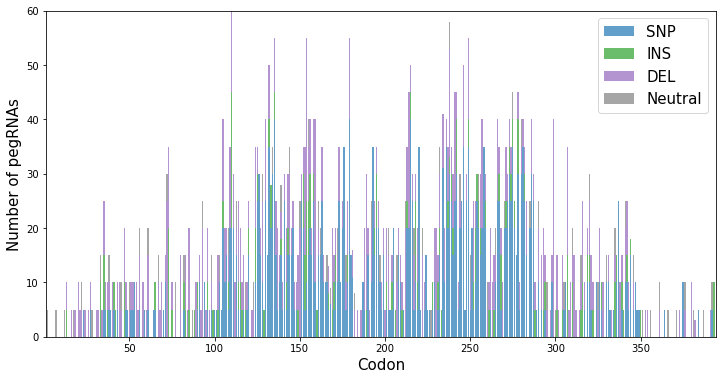

In [96]:
pegg.lollipop_library(ranked_filtered, gene_name, start_end_cds,strand, plot=True);


For a more informative visualization, we can add in the HGVSp information back to our dataframe, allowing us to visualize the precise amino acid changes that are included in our library:

In [98]:
#adding HGVSp information back to the dataframe if it's available...
hg = []
for i, val in ranked_filtered.iterrows():
    idx = val['mutant index']
    hgvsp = library_input.loc[[idx]]['HGVSp'].values[0]
    hg.append(hgvsp)
    
#also add in information for identifying neutral mutations
class_mut = []
for i, val in ranked_filtered.iterrows():
    idx = val['mutant index']
    neut = library_input.loc[[idx]]['classification'].values[0]
    class_mut.append(neut)

ranked_filtered['HGVSp']=hg
ranked_filtered['classification']=class_mut



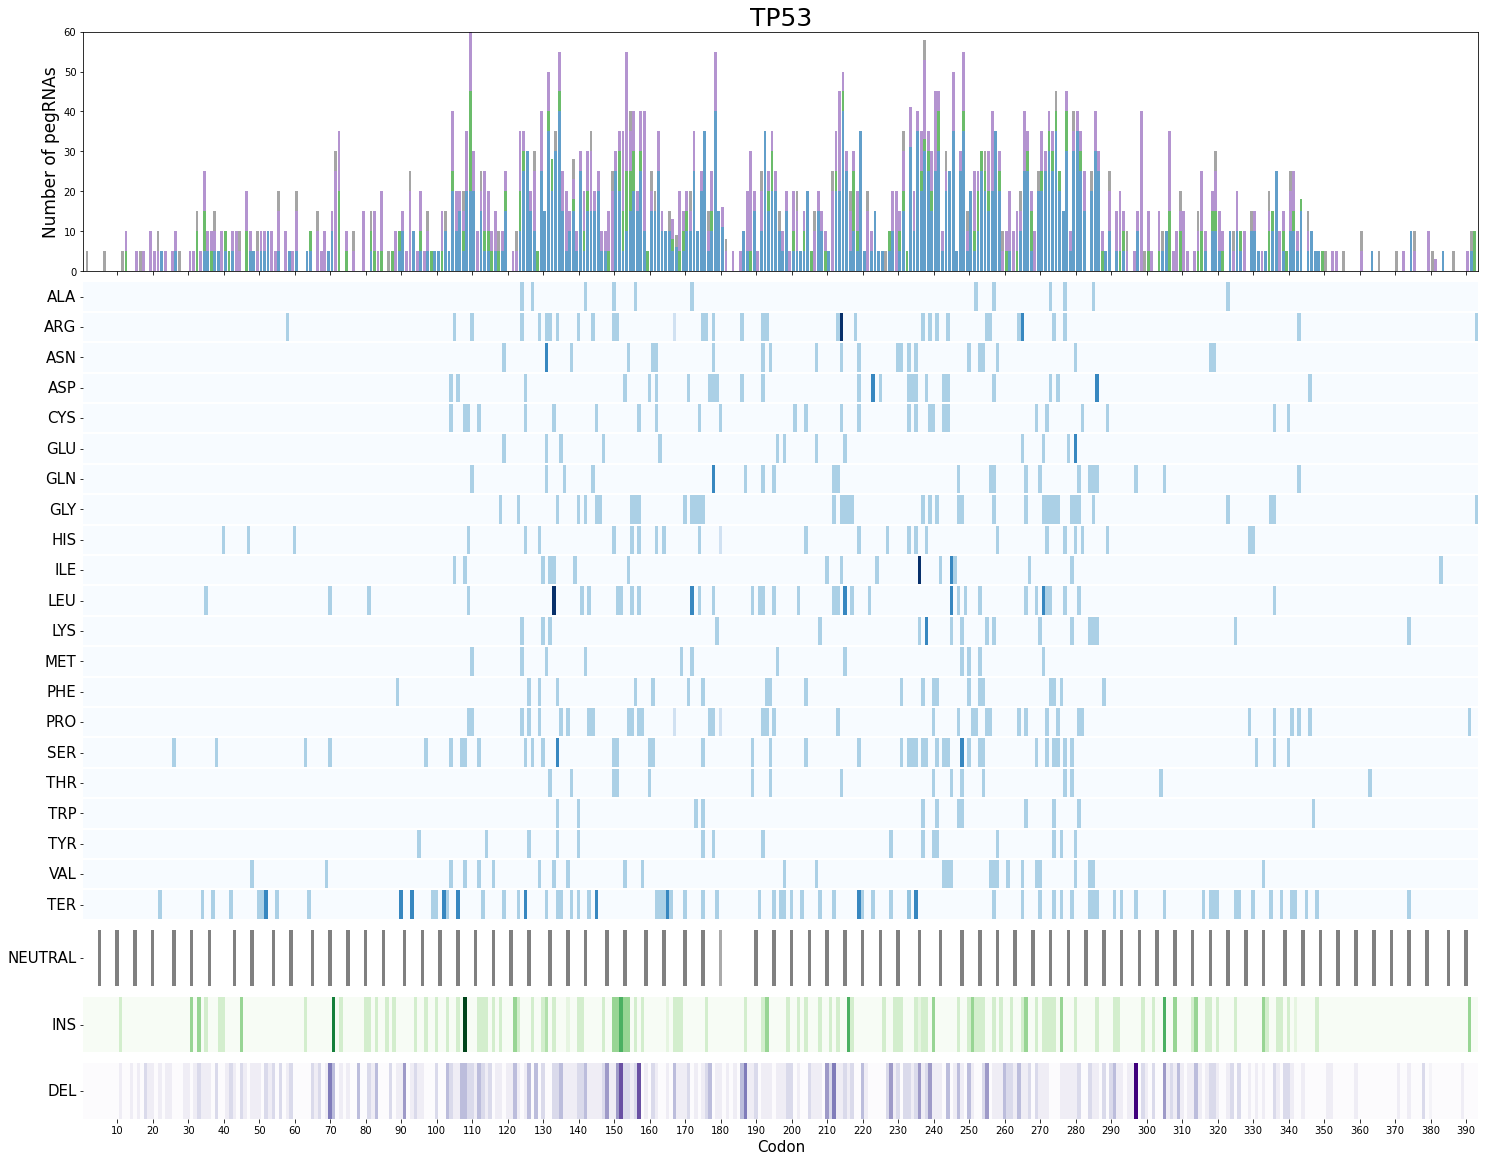

In [99]:
matrix_snp,matrix_ins, matrix_del, matrix_neutral, fig=pegg.matrix_rep_library(ranked_filtered,gene_name,start_end_cds,strand, plot=True);


# Case Study 3: Modeling ClinVar Variants

Section below is incomplete...

In [75]:
from cyvcf2 import VCF

variation_id = 920680
#choose which variant you want to model...
gene = []
ref = []
alt = []
chrom = []
start = []
end = []
clinical = []
#id1=[]

for variant in VCF('/Users/samgould/Desktop/clinvar_20221001.vcf.gz'): # or VCF('some.bcf')
    
    count+=1
    #variant.REF, variant.ALT # e.g. REF='A', ALT=['C', 'T']
    #id1.append(int(variant.ID))
    if int(variant.ID) == variation_id:
        print(variant)
        #change it to make it flexible for a list
        gene.append(variant.INFO.get('GENEINFO'))
        clinical.append(variant.INFO.get('CLNSIG'))
        ref.append(variant.REF)
        alt.append(variant.ALT)
        chrom.append(variant.CHROM)
        start.append(variant.start)
        end.append(variant.end)
        #d1.append(variant.ID)
        
        break
        
        
#TO DO:
#TURN IT INTO A PANDAS DATAFRAME AND DO A TEST RUN
#ALSO MAKE IT AMENABLE TO A LIST OF VARIATION IDS

[W::vcf_parse] Contig '1' is not defined in the header. (Quick workaround: index the file with tabix.)
[W::vcf_parse] Contig '2' is not defined in the header. (Quick workaround: index the file with tabix.)
[W::vcf_parse] Contig '3' is not defined in the header. (Quick workaround: index the file with tabix.)
[W::vcf_parse] Contig '4' is not defined in the header. (Quick workaround: index the file with tabix.)
[W::vcf_parse] Contig '5' is not defined in the header. (Quick workaround: index the file with tabix.)
[W::vcf_parse] Contig '6' is not defined in the header. (Quick workaround: index the file with tabix.)
[W::vcf_parse] Contig '7' is not defined in the header. (Quick workaround: index the file with tabix.)
[W::vcf_parse] Contig '8' is not defined in the header. (Quick workaround: index the file with tabix.)
[W::vcf_parse] Contig '9' is not defined in the header. (Quick workaround: index the file with tabix.)
[W::vcf_parse] Contig '10' is not defined in the header. (Quick workaroun

17	7571217	920680	A	C	.	.	ALLELEID=914162;CLNDISDB=MONDO:MONDO:0015356,MeSH:D009386,MedGen:C0027672,Orphanet:ORPHA140162,SNOMED_CT:699346009;CLNDN=Hereditary_cancer-predisposing_syndrome;CLNHGVS=NC_000017.10:g.7571217A>C;CLNREVSTAT=criteria_provided,_single_submitter;CLNSIG=Likely_benign;CLNVC=single_nucleotide_variant;CLNVCSO=SO:0001483;CLNVI=Color_Diagnostics,_LLC_DBA_Color_Health:Db4KrQBSZeoE7-orUyypkbhr3Gov_FiugTSTC00Jkd8;GENEINFO=TP53:7157;ORIGIN=1;RS=886596112



[W::vcf_parse] Contig '17' is not defined in the header. (Quick workaround: index the file with tabix.)


In [16]:
#results from TP53 <50 bp size query
clinvar = pd.read_csv('/Users/samgould/Desktop/clinvar_result.txt', sep='\t')

In [31]:
clinvar.iloc[[0]]

,Name,Gene(s),Protein change,Condition(s),Clinical significance (Last reviewed),Review status,Accession,GRCh37Chromosome,GRCh37Location,GRCh38Chromosome,GRCh38Location,VariationID,AlleleID(s),dbSNP ID,Canonical SPDI,Unnamed: 15
0,NC_000017.11:g.7667874G>C,TP53,NaN,Hereditary cancer-predisposing syndrome,"Likely benign(Last reviewed: Apr 26, 2016)","criteria provided, single submitter",VCV000925574,17,7571192,17,7667874,925574,914159,rs1049800949,NC_000017.11:7667873:G:C,NaN


In [30]:
spdi = list(clinvar['Canonical SPDI'])
spdi = [i.split('NC_000017.11:')[1] for i in spdi] #there are all referenecs to GrCh38...
spdi

['7667873:G:C',
 '7667879:G:A',
 '7667887:G:A',
 '7667898:A:C',
 '7667900:C:T',
 '7667903:C:T',
 '7667905:C:T',
 '7667905:C:A',
 '7667907:C:A',
 '7667908:C:T',
 '7667909:C:A',
 '7667913:C:T',
 '7667922:T:G',
 '7667925:C:T',
 '7667928:C:T',
 '7667932:C:T',
 '7668133:G:A',
 '7668169:GCCGTGGCCG:GCCGTGGCCGTGGCCG',
 '7668202:CC:CCC',
 '7668387:C:G',
 '7668433:T:G',
 '7668448:A:C',
 '7668476:G:A',
 '7668538:G:A',
 '7668631:C:G',
 '7668672:T:C',
 '7668782:C:T',
 '7668802:G:T',
 '7668818:C:T',
 '7668829:G:',
 '7668835:G:A',
 '7668836:AAAAAAAAAAAAAAAAAA:AAAAAAAAAAAAAAAAA',
 '7668847:A:G',
 '7668848:A:G',
 '7668854:G:A',
 '7668861:G:A',
 '7668873:G:T',
 '7668982:G:A',
 '7668995:G:T',
 '7669038:AC:',
 '7669043:C:A',
 '7669060:C:A',
 '7669123:C:T',
 '7669199:G:T',
 '7669226:G:A',
 '7669251:A:G',
 '7669261:A:G',
 '7669262:C:A',
 '7669280:C:T',
 '7669281:G:A',
 '7669403:C:T',
 '7669440:G:A',
 '7669464:C:T',
 '7669509:C:T',
 '7669592:C:A',
 '7669593:A:G',
 '7669595:G:A',
 '7669599:TGGA:TGGATGGA',
 '7

In [6]:
filepath='/Users/samgould/Desktop/cellline_ccle_broad/data_mutations.txt'
ccle = pd.read_csv(filepath, sep='\t')

/var/folders/5g/xxjcy2g531n02hnyb6d8qdsr0000gn/T/ipykernel_84732/1991226972.py:2: DtypeWarning: Columns (4,37,38,39,40,41,43,45,46,47,48,49,52,53,54,55,56,57,58,59,60,61,62,65,66,67,68,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95) have mixed types. Specify dtype option on import or set low_memory=False.
  ccle = pd.read_csv(filepath, sep='\t')
